<a href="https://colab.research.google.com/github/ShahinGanbar/Wake-Word-Detector/blob/main/Wake-Word-Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2025-12-23 10:46:48--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.183.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G   271MB/s    in 9.1s    

2025-12-23 10:46:57 (254 MB/s) - ‘speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [3]:
!tar -xvf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [4]:
!pip install librosa numpy torch torchaudio matplotlib


In [10]:
import librosa
import numpy as np

def wav_to_mel(path, sr=16000, n_mels=64):
    audio, sr = librosa.load(path, sr=sr)

    mel = librosa.feature.melspectrogram(
        y=audio,
        sr=sr,
        n_mels=n_mels,
        n_fft=1024,
        hop_length=512
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db


In [70]:
import os
import torch
from torch.utils.data import Dataset

class WakeWordDataset(Dataset):
    def __init__(self, root_dir, wake_word="marvin"):
        self.samples = []
        self.marvins = []
        self.others = []

        for folder in os.listdir(root_dir):
            okay = 0
            if folder == wake_word:
                okay = 1
            folder_path = os.path.join(root_dir, folder)
            if not os.path.isdir(folder_path):
                continue

            label = 1 if folder == wake_word else 0
            i = 0
            for file in os.listdir(folder_path):
                if file.endswith(".wav"):
                    i+=1
                    if okay == 1:
                       self.marvins.append(os.path.join(folder_path, file))
                    elif i <= 2100:
                        self.others.append(os.path.join(folder_path, file))
                    self.samples.append(
                        (os.path.join(folder_path, file), label)
                    )

    def len(self):
        return len(self.samples)

    def get_item(self, idx):
        path, label = self.samples[idx]
        mel = wav_to_mel(path)

        mel = torch.tensor(mel).unsqueeze(0)  # (1, n_mels, time)
        label = torch.tensor(label)

        return mel, label


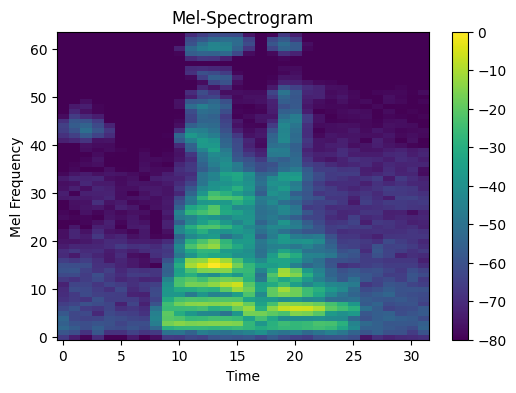

In [13]:
import matplotlib.pyplot as plt

mel = wav_to_mel("marvin/0a7c2a8d_nohash_0.wav")

plt.figure(figsize=(6, 4))
plt.imshow(mel, aspect='auto', origin='lower')
plt.colorbar()
plt.title("Mel-Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


In [72]:
a = WakeWordDataset("/content/")


In [40]:
a.samples[60617]

('/content/marvin/62605293_nohash_2.wav', 1)

In [58]:
len(a.samples)

70269

In [68]:
len(a.marvins)


2100

In [45]:
elebele = wav_to_mel(a.samples[60619][0])

In [73]:
len(a.others)

68217

In [74]:
a.others[0]

'/content/_background_noise_/running_tap.wav'

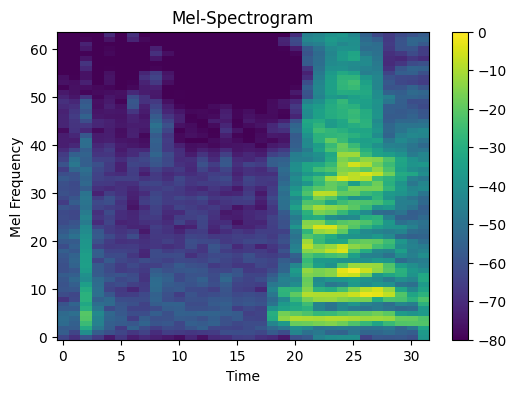

In [46]:
plt.figure(figsize=(6, 4))
plt.imshow(elebele, aspect='auto', origin='lower')
plt.colorbar()
plt.title("Mel-Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

In [47]:
print(elebele.shape)

(64, 32)


In [50]:
print(type(elebele))

<class 'numpy.ndarray'>


'/content/marvin/62605293_nohash_2.wav'

In [76]:
import random as rn

others = rn.sample(a.others, 2100)



In [80]:
print(others)

['/content/six/70a00e98_nohash_3.wav', '/content/wow/6e2ef3d5_nohash_0.wav', '/content/one/a045368c_nohash_1.wav', '/content/three/d84829e0_nohash_0.wav', '/content/follow/1acc97de_nohash_2.wav', '/content/yes/8134f43f_nohash_2.wav', '/content/down/21832144_nohash_1.wav', '/content/nine/ef3367d9_nohash_3.wav', '/content/down/d1dd03ed_nohash_1.wav', '/content/up/aeb99b1c_nohash_0.wav', '/content/house/a759efbc_nohash_2.wav', '/content/go/472b8045_nohash_3.wav', '/content/go/fb7008b0_nohash_0.wav', '/content/no/1365dd89_nohash_0.wav', '/content/no/f8f60f59_nohash_3.wav', '/content/five/b87bdb22_nohash_0.wav', '/content/seven/4a1e736b_nohash_1.wav', '/content/go/a7216980_nohash_3.wav', '/content/off/61ab8fbc_nohash_3.wav', '/content/up/017c4098_nohash_4.wav', '/content/down/6071a214_nohash_0.wav', '/content/happy/f798ac78_nohash_0.wav', '/content/wow/ff2b842e_nohash_0.wav', '/content/yes/7846fd85_nohash_1.wav', '/content/go/ab9b93e4_nohash_2.wav', '/content/tree/cc2f1a85_nohash_0.wav', '/

In [82]:
marvinler = []
basqalari = []

for x in a.marvins:
    mel = wav_to_mel(x)
    marvinler.append(mel)

for x in others:
    mel = wav_to_mel(x)
    basqalari.append(mel)

print(marvinler)
print(basqalari)

Streaming output truncated to the last 5000 lines.
       [-71.285904, -70.0065  , -70.65869 , ..., -69.47992 , -70.97702 ,
        -69.139404]], dtype=float32), array([[-30.90871 , -32.107826, -34.91913 , ..., -46.750183, -40.555305,
        -38.95724 ],
       [-28.246922, -29.265505, -23.002583, ..., -41.196487, -35.258305,
        -30.221436],
       [-27.444365, -27.0501  , -24.853212, ..., -36.612556, -34.101177,
        -31.317799],
       ...,
       [-60.194214, -56.304558, -55.253876, ..., -59.628464, -58.33014 ,
        -60.41185 ],
       [-62.924133, -60.00209 , -59.815163, ..., -64.52685 , -63.862907,
        -64.74083 ],
       [-68.0741  , -68.71211 , -69.61837 , ..., -74.08515 , -72.99162 ,
        -66.78839 ]], dtype=float32), array([[-48.453426, -44.65499 , -39.876293, ..., -37.421314, -40.732956,
        -41.078465],
       [-55.65902 , -49.150143, -29.137821, ..., -46.858498, -49.18692 ,
        -48.370964],
       [-48.816578, -42.879448, -28.425673, ..., -60.7797

In [83]:
len(marvinler)

2100

In [84]:
len(basqalari)

2100

In [86]:
import numpy as np

marvinler = np.array(marvinler)   # shape -> (2100, n_mels, time_steps)
basqalari = np.array(basqalari)   # shape -> (2100, n_mels, time_steps)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2100, 64) + inhomogeneous part.

In [91]:
st = set()
for x in basqalari:
    st.add(x.shape)
print(st)

{(64, 14), (64, 20), (64, 17), (64, 23), (64, 26), (64, 32), (64, 29), (64, 16), (64, 19), (64, 25), (64, 22), (64, 28), (64, 31), (64, 15), (64, 18), (64, 21), (64, 27), (64, 24), (64, 30)}


In [95]:
stM = set()
for x in marvinler:
    stM.add(x.shape)
print(stM)

{(64, 14), (64, 17), (64, 23), (64, 26), (64, 32), (64, 29), (64, 13), (64, 16), (64, 19), (64, 25), (64, 22), (64, 28), (64, 31), (64, 15), (64, 18), (64, 21), (64, 27), (64, 24), (64, 30)}
